In [1]:
import sys
sys.path.append(r'C:\\Users\\Pedro\\Dropbox\\repository\\projects\\finances.git\\finances')
%matplotlib inline


In [2]:
import os
import numpy as np
import pandas as pd
import pyfolio as pf

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Anaconda3\envs\finance\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
from crypto_currencies.crypto_data import get_btc_price

In [4]:
btc_df = get_btc_price()
btc_df

Loaded BCHARTS/KRAKENUSD from cache
Loaded BCHARTS/COINBASEUSD from cache
Loaded BCHARTS/BITSTAMPUSD from cache
Loaded BCHARTS/ITBITUSD from cache


Date
2011-09-13        5.9700
2011-09-14        5.5300
2011-09-15        5.1300
2011-09-16        4.8500
2011-09-17        4.8700
2011-09-18        4.9200
2011-09-19        4.9000
2011-09-20        5.6600
2011-09-21        5.6600
2011-09-22        5.7200
2011-09-23        5.7200
2011-09-24        5.6800
2011-09-25        6.0500
2011-09-26        4.8000
2011-09-27        4.9200
2011-09-28        4.8200
2011-09-29        4.8200
2011-10-03        4.8700
2011-10-04        4.9800
2011-10-05        4.9200
2011-10-06        4.8000
2011-10-07        4.6100
2011-10-08        3.9900
2011-10-09        3.8900
2011-10-10        4.5100
2011-10-11        4.1000
2011-10-12        3.9300
2011-10-13        3.9700
2011-10-14        4.0500
2011-10-17        3.9200
                 ...    
2017-12-11    16710.2600
2017-12-12    17150.7350
2017-12-13    16401.8275
2017-12-14    16532.3175
2017-12-15    17598.9300
2017-12-16    19388.1650
2017-12-17    19075.6475
2017-12-18    18935.8725
2017-12-19    17683.

In [5]:
def cal_returns(array):
    return array[-1]/array[0]-1

btc_df_returns = btc_df.dropna().rolling(window=2).apply(cal_returns)

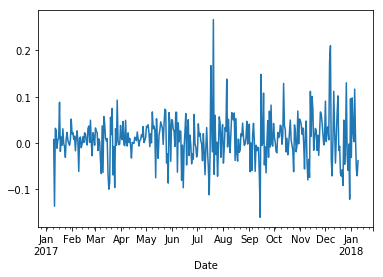

In [ ]:
btc_rets = btc_df_returns[-365:].dropna()
btc_rets.plot()

Entire data start date: 2017-01-11
Entire data end date: 2018-01-09
In-sample months: 15
Out-of-sample months: 1


,All,In-sample,Out-of-sample
Annual return,579.1%,732.1%,-29.2%
Cumulative returns,1491.1%,1558.0%,-4.0%
Annual volatility,77.5%,74.3%,108.4%
Sharpe ratio,2.86,3.23,0.20
Calmar ratio,16.32,20.64,-0.85
Stability,0.95,0.95,0.25
Max drawdown,-35.5%,-35.5%,-34.6%
Omega ratio,1.67,1.80,1.03
Sortino ratio,4.86,5.58,0.31
Skew,0.56,0.64,0.40


C:\Anaconda3\envs\finance\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,35.48,2017-06-11,2017-07-16,2017-08-05,40
1,34.55,2017-12-16,2017-12-30,NaT,NaN
2,34.21,2017-09-01,2017-09-14,2017-10-12,30
3,27.74,2017-03-03,2017-03-24,2017-04-26,39
4,21.32,2017-11-08,2017-11-12,2017-11-16,7


ValueError: Found input variables with inconsistent numbers of samples: [127, 184]

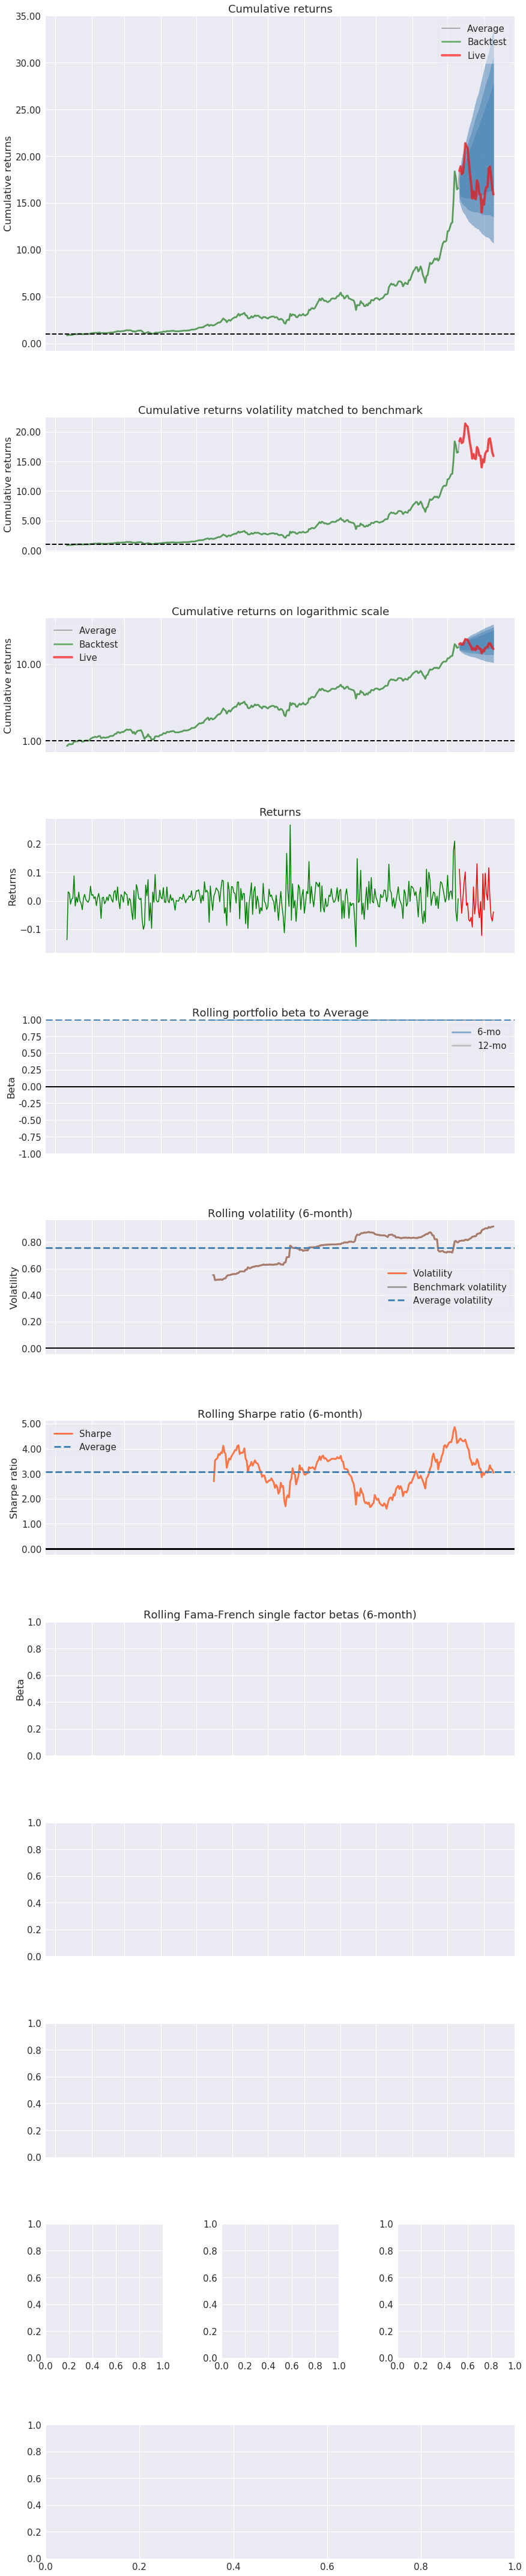

In [26]:
pf.create_returns_tear_sheet(btc_rets, benchmark_rets=btc_rets, live_start_date=btc_rets.index[-30])

In [ ]:
pf.create_bayesian_tear_sheet(btc_rets, benchmark_rets=btc_rets, live_start_date=btc_rets.index[-30])

Running T model


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
  1%|▌                                                                               | 16/2500 [00:18<47:22,  1.14s/it]